In [1]:
import cifar10
import matplotlib.pyplot as plt
import time

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [47]:
class_names = cifar10.load_class_names()
class_names[9]

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


'truck'

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
print(images_train.shape)
print(images_test.shape)
print(labels_test[0][4])

(50000, 32, 32, 3)
(10000, 32, 32, 3)
0.0


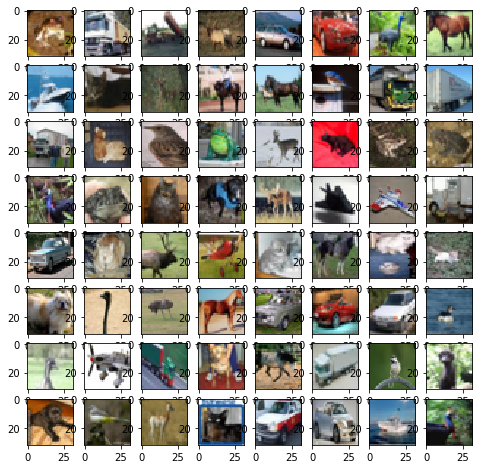

In [7]:
fig=plt.figure(figsize=(8,8)) # 8X8 space created
for i in range(64):
    ax=fig.add_subplot(8,8,i+1) # no of parameters-rows,now of cols, position (starting from 1)
    ax.imshow(images_train[i])
plt.show()

In [7]:
x_train=images_train.reshape((50000,3072))
x_test=images_test.reshape((10000,3072))
y_train=cls_train
y_test=cls_test

APPLYING PCA

In [8]:
from sklearn.decomposition import  PCA

In [14]:
pca=PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.components_.shape

(3072, 3072)

In [16]:
#finding optimum value of features needed
k=0
total=sum(pca.explained_variance_)
current_sum=0
while current_sum/total < 0.90:
    current_sum+=pca.explained_variance_[k]
    k+=1
print(k) # only 658 features needed out  of 3072 for keeping 99 percent of total information

99


In [17]:
pca=PCA(n_components=k,whiten=True) #whiten =true similiar to feature_scaling #these 123 will be 0 mean and variance
transformed_data=pca.fit_transform(x_train)
transformed_data.shape

(50000, 99)

In [18]:
x_approx=pca.inverse_transform(transformed_data)
x_approx.shape

(50000, 3072)

In [19]:
x_approx_images=x_approx.reshape((50000,32,32,3))

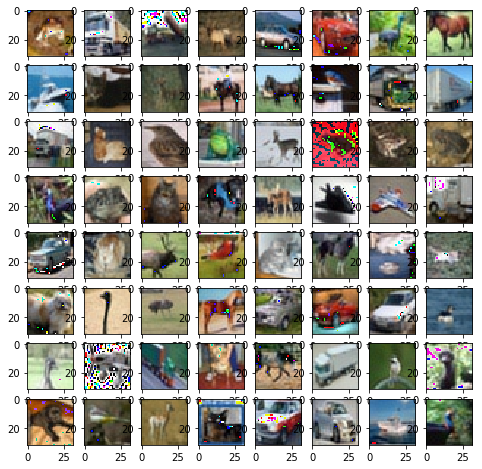

In [20]:
fig=plt.figure(figsize=(8,8)) # 8X8 space created
for i in range(64):
    ax=fig.add_subplot(8,8,i+1) # no of parameters-rows,now of cols, position (starting from 1)
    ax.imshow(x_approx_images[i])
plt.show()

In [19]:
x_train_pca=transformed_data
x_test_pca=pca.transform(x_test)

USING RANDOM FOREST

In [20]:
#AFTER APPLYING PCA
import time
from sklearn import ensemble
from sklearn.metrics import classification_report,confusion_matrix
rf=ensemble.RandomForestClassifier()
start=time.time()
rf.fit(x_train_pca,y_train)
print(time.time()-start)
y_pred=rf.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

12.251770496368408
             precision    recall  f1-score   support

          0       0.32      0.49      0.39      1000
          1       0.32      0.43      0.37      1000
          2       0.22      0.28      0.25      1000
          3       0.22      0.22      0.22      1000
          4       0.29      0.28      0.28      1000
          5       0.29      0.23      0.26      1000
          6       0.37      0.31      0.34      1000
          7       0.33      0.22      0.26      1000
          8       0.45      0.39      0.42      1000
          9       0.36      0.26      0.30      1000

avg / total       0.32      0.31      0.31     10000

[[492  88  84  41  40  31  25  34 126  39]
 [119 429  45  55  30  39  26  42  70 145]
 [138  69 281 100 141  68  96  54  35  18]
 [101  89 134 222  77 139  96  62  32  48]
 [101  47 211  79 275  56 107  73  29  22]
 [ 83  84 134 173  96 234  68  61  34  33]
 [ 63  60 167 121 123  79 306  36  22  23]
 [111 100 118 106 106  73  53 220  45  68

In [29]:
#WITHOUT APPLYING PCA
import time
from sklearn import ensemble
from sklearn.metrics import classification_report,confusion_matrix
rf=ensemble.RandomForestClassifier()
start=time.time()
rf.fit(x_train,y_train)
print(time.time()-start)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

32.00843000411987
             precision    recall  f1-score   support

          0       0.37      0.53      0.43      1000
          1       0.37      0.44      0.40      1000
          2       0.24      0.29      0.26      1000
          3       0.24      0.26      0.25      1000
          4       0.27      0.28      0.27      1000
          5       0.33      0.27      0.30      1000
          6       0.41      0.34      0.37      1000
          7       0.40      0.29      0.33      1000
          8       0.53      0.47      0.50      1000
          9       0.44      0.35      0.39      1000

avg / total       0.36      0.35      0.35     10000

[[527  64  87  37  30  26  18  30 140  41]
 [ 92 441  46  58  39  42  39  41  66 136]
 [151  63 290  89 153  65  77  65  28  19]
 [ 90  74 132 255  99 136  94  56  26  38]
 [ 86  49 210  88 277  55 127  66  18  24]
 [ 84  62 132 201  80 267  62  68  23  21]
 [ 39  58 137 128 156  74 344  33   8  23]
 [103  77  92  86 127  81  47 289  25  73]

USING KNN with grid search

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier()
start=time.time()
knn.fit(x_train_pca,y_train)
print(time.time()-start)
y_pred=knn.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.7994096279144287
             precision    recall  f1-score   support

          0       0.32      0.61      0.42      1000
          1       0.73      0.15      0.25      1000
          2       0.19      0.46      0.26      1000
          3       0.33      0.13      0.19      1000
          4       0.25      0.54      0.34      1000
          5       0.45      0.12      0.18      1000
          6       0.33      0.31      0.32      1000
          7       0.78      0.18      0.29      1000
          8       0.44      0.59      0.50      1000
          9       0.85      0.03      0.06      1000

avg / total       0.47      0.31      0.28     10000

[[613   0 113   7  50   0  27   4 186   0]
 [189 154 176  30 143  13  85   9 197   4]
 [149   1 457  24 251  20  70   1  27   0]
 [135   8 313 133 207  38 122   7  37   0]
 [117   0 244  13 544   8  44   5  25   0]
 [113   2 354  91 198 115  87  10  28   2]
 [ 59   3 271  31 304   8 306   0  18   0]
 [123   4 268  28 282  36  55 178  26   0

In [24]:
y_pred_knn=y_pred

Using SVM

In [25]:
from sklearn import svm

In [26]:
sv = svm.SVC()

In [27]:
start=time.time()
sv.fit(x_train_pca,y_train)
print(time.time()-start)
#took 1:30 hours for 99 percent 638 features

789.0892989635468


In [28]:
y_pred_sv=sv.predict(x_test_pca)


In [29]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_sv))
print(confusion_matrix(y_test,y_pred_sv))

             precision    recall  f1-score   support

          0       0.66      0.63      0.65      1000
          1       0.67      0.70      0.68      1000
          2       0.44      0.40      0.42      1000
          3       0.40      0.42      0.41      1000
          4       0.49      0.48      0.49      1000
          5       0.48      0.46      0.47      1000
          6       0.59      0.65      0.62      1000
          7       0.66      0.59      0.62      1000
          8       0.69      0.69      0.69      1000
          9       0.58      0.64      0.61      1000

avg / total       0.57      0.57      0.57     10000

[[633  31  51  23  22  17  18  11 134  60]
 [ 24 700   9  26   9  13  18  15  38 148]
 [ 76  21 403  96 135  79 101  43  17  29]
 [ 24  34  82 416  61 166 100  46  13  58]
 [ 34   9 137  74 483  59 106  67  20  11]
 [ 16  17  84 200  67 455  54  71  15  21]
 [ 12  16  77  85  79  38 649  17   8  19]
 [ 22  16  39  68  94  85  24 590  10  52]
 [ 88  58  17  31

In [48]:
y_pred_sv.min()

0

In [88]:
import numpy as np
y_pred_class_names=[]
for i in y_pred_sv:
    y_pred_class_names.append(class_names[i])


    
 
y_pred_class_names=np.array(y_pred_class_names)

np.savetxt('cifar_pred_svm.csv', y_pred_class_names , delimiter=" ", fmt="%s")
#np.savetxt('test.csv', string_list , delimiter=" ", fmt="%s")

Applying Grid Search on SVM


In [25]:
from sklearn.model_selection import GridSearchCV
grid = {'C' : [1e2, 1e3, 5e3, 1e4, 5e4, 1e5],
       'gamma' : [1e-3, 5e-4, 1e-4, 5e-3]}
abc = GridSearchCV(sv, grid)

In [ ]:
abc.fit(x_train_pca, y_train)

In [ ]:
start=time.time()
abc.fit(x_train_pca, y_train)
print(time.time()-start)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [95]:
class_names[y_test[2]]

'ship'

In [96]:
class_names[y_pred_sv[2]]

'ship'